# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

#### More information about the dataset: 
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    <li> the dataset used is much bigger </li>
</i>

### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the data

In [2]:
raw_data = pd.read_csv('Bank-data.csv')
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [3]:
data = raw_data.copy()
data = data.drop(['Unnamed: 0'], axis = 1)
data['y'] = data['y'].map({'no':0, 'yes':1})

In [4]:
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [5]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

In [6]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

In [7]:
x = sm.add_constant(x1.to_numpy())
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [8]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 May 2020   Pseudo R-squ.:                  0.2121
Time:                        16:17:04   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
x1             0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

The dependent variable is 'y' which shows whether the marketing campaign was successful with this customer. The model used is a Logit regression (logistic in common lingo), while the method - Maximum Likelihood Estimation (MLE). It has clearly converged after classifyin 518 observations. 

- The model is significant as its LLR p-value is well on the 0.000 zone.

- The Pseudo R-squared is 0.21 which is within the 'acceptable region'. 

- The 'duration' variable is significant and its coefficient is 0.0051.

- The constant is also significant and equals: -1.70

### Visualisartion
Run the regression and visualize it on a scatter plot (no need to plot the line).

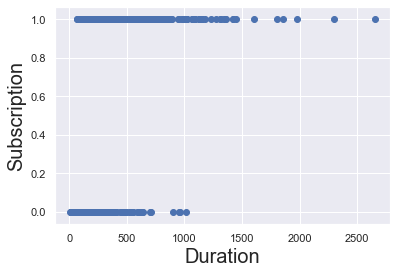

In [9]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

### Find the odds of duration

In the same way we created dummies for linear regression, we can use **binary predictors** in a logistic regression.

In [10]:
# model is: log(odds) = -1.7001 + 0.0051*duration
# the odds of duration are the exponential of the log odds from the summary table (coefficient)

np.exp(0.0051)

1.005113027136717

The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, a change in 1 day would barely affect the regression. 

Note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude.

### Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

In [11]:
# To avoid writing them out every time, we save the names of the estimators of our model in a list. 
estimators=['interest_rate','march','credit','previous','duration']

X1 = data[estimators]
y = data['y']

In [26]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: y                AIC:              360.7836  
Date:               2020-05-07 16:17 BIC:              386.2834  
No. Observations:   518              Log-Likelihood:   -174.39   
Df Model:           5                LL-Null:          -359.05   
Df Residuals:       512              LLR p-value:      1.2114e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

## Accuracy of the model

We have a model that predicts values and we also have the actual values (data['y']]

In [30]:
#PREDICTED VALUES BY THE MODEL
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_logit.predict()

# there are zeros, ones and values in between. Those are probabilities of a client sibscribing to the marketing campaign
# Values < 0.50, probability is less than 50% and we would round down to zero.
# Alternatively values > 0.50 we would round up to 1

array([0.11, 0.94, 0.01, 0.81, 0.01, 0.53, 0.03, 0.00, 0.71, 0.07, 0.95,
       0.50, 0.89, 0.10, 0.08, 0.82, 0.87, 0.85, 0.37, 0.76, 0.97, 0.87,
       0.13, 0.10, 0.65, 0.09, 0.77, 0.76, 0.90, 0.04, 0.02, 0.12, 0.27,
       0.71, 0.06, 0.01, 0.99, 0.06, 1.00, 0.54, 0.06, 0.84, 0.06, 0.01,
       0.87, 0.55, 0.00, 0.15, 0.16, 0.83, 0.72, 0.05, 0.03, 0.05, 0.01,
       0.81, 0.09, 0.80, 0.98, 0.84, 0.04, 0.11, 0.99, 0.76, 0.16, 0.31,
       0.05, 0.06, 1.00, 0.07, 0.02, 0.72, 0.14, 0.97, 0.87, 0.13, 0.67,
       0.05, 0.01, 0.03, 0.92, 0.79, 0.89, 0.13, 0.19, 0.98, 0.64, 0.86,
       0.74, 0.03, 0.08, 0.03, 0.71, 0.64, 0.95, 0.97, 0.97, 0.03, 0.98,
       0.06, 0.99, 0.07, 0.99, 0.69, 0.28, 0.36, 0.20, 0.70, 0.73, 0.03,
       0.99, 0.41, 0.16, 0.05, 0.94, 0.02, 0.04, 0.90, 0.50, 0.14, 0.10,
       0.00, 0.92, 1.00, 0.33, 0.98, 0.93, 0.84, 0.70, 0.67, 0.05, 0.26,
       0.81, 0.79, 0.81, 0.08, 0.22, 0.74, 0.11, 0.01, 0.01, 0.01, 0.23,
       0.79, 0.23, 1.00, 0.23, 0.01, 1.00, 0.54, 0.

In [14]:
#ACTUAL VALUES
np.array(data['y'])

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

If 80% of the predicted values coincide with the actual values, we say the model has 80% accuracy.

In [31]:
#pred_table method returns a table which compares predicted and atual values

results_logit.pred_table()

array([[218.00, 41.00],
       [30.00, 229.00]])

In [32]:
#CONFUSION MATRIX

cm_df = pd.DataFrame(results_logit.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
cm_df                     

,Predicted 0,Predicted 1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


In [33]:
good_job = (218 + 229)/518 *100
print('The accuracy of the model is', good_job,'%')

The accuracy of the model is 86.2934362934363 %


In [45]:
# Short piece of code that will compute the accuracy of the model
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.862934362934363

### Confusion Matrix

Create the confusion matrix of the model and estimate its accuracy. 

In [19]:
def confusion_matrix(data,actual_values,model):
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [46]:
cm_train = confusion_matrix(X,y,results_logit)
cm_train

(array([[218.00, 41.00],
        [30.00, 229.00]]), 0.862934362934363)

## Test the model

1. We will use our model to make predictions on the test data
2. We will compare those with the actual outcome
3. Calculate the accuracy

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

In [21]:
test = pd.read_csv('Bank-data-testing.csv')
test.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


In [22]:
data_test = test.copy()
data_test = data_test.drop('Unnamed: 0', axis=1)
data_test['y'] = data_test['y'].map({'no':0, 'yes':1})
data_test.describe()

,interest_rate,credit,march,may,previous,duration,y
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000
mean,2.922095,0.031532,0.274775,0.346847,0.099099,398.860360,0.50000
std,1.891766,0.175144,0.447410,0.755950,0.299470,410.565798,0.50113
min,0.639000,0.000000,0.000000,0.000000,0.000000,6.000000,0.00000
25%,1.049250,0.000000,0.000000,0.000000,0.000000,144.750000,0.00000
50%,1.714000,0.000000,0.000000,0.000000,0.000000,255.500000,0.50000
75%,4.960000,0.000000,1.000000,0.000000,0.000000,525.250000,1.00000
max,4.968000,1.000000,1.000000,4.000000,1.000000,3643.000000,1.00000


### Declare the dependent and the independent variables

In [39]:
y_test = data_test['y']
x1_test = data_test[estimators]
x_test = sm.add_constant(x1_test)
x_test.head()

,const,interest_rate,march,credit,previous,duration
0,1.0,1.313,1.0,0.0,0.0,487.0
1,1.0,4.961,0.0,0.0,0.0,132.0
2,1.0,4.856,1.0,0.0,0.0,92.0
3,1.0,4.120,0.0,0.0,0.0,1468.0
4,1.0,4.963,0.0,0.0,0.0,36.0


In [24]:
estimators

['interest_rate', 'march', 'credit', 'previous', 'duration']

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [41]:
#test accuracy
cm_test = confusion_matrix(x_test, y_test, results_logit)
cm_test

(array([[93.00, 18.00],
        [13.00, 98.00]]), 0.8603603603603603)

In [47]:
#train accuracy
cm_train

(array([[218.00, 41.00],
        [30.00, 229.00]]), 0.862934362934363)

Looking at the test acccuracy we see a number which is a tiny but lower: 86.04%, compared to 86.29% for train accuracy. 

In general, we always expect the test accuracy to be lower than the train one. If the test accuracy is higher, this is just due to luck.
